In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


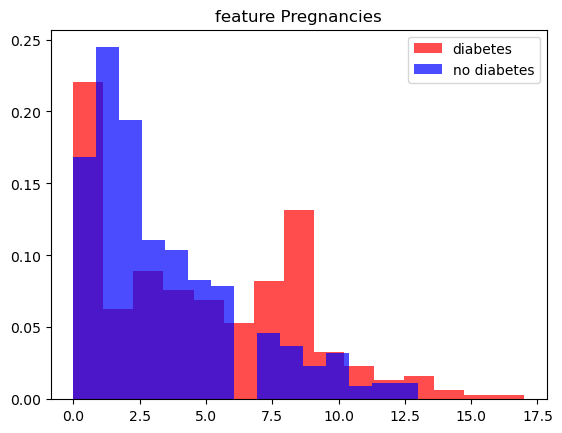

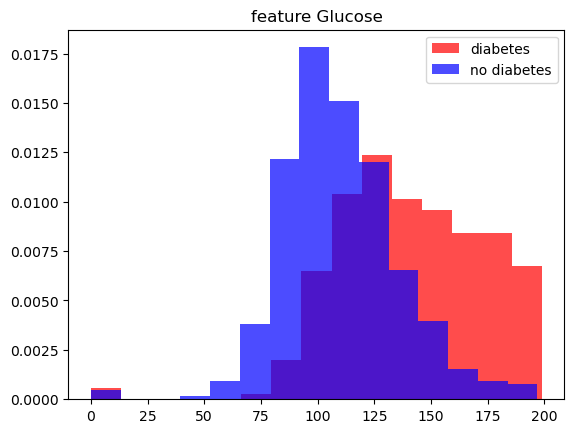

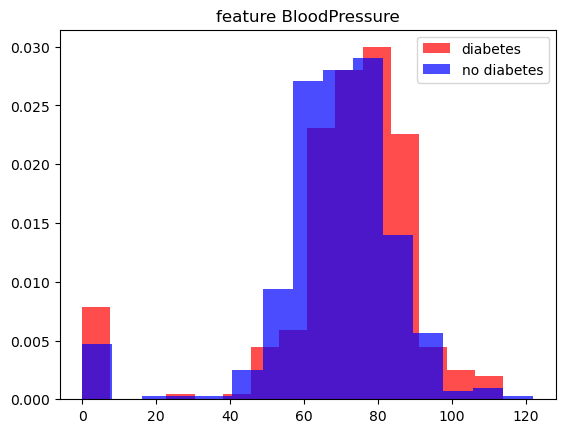

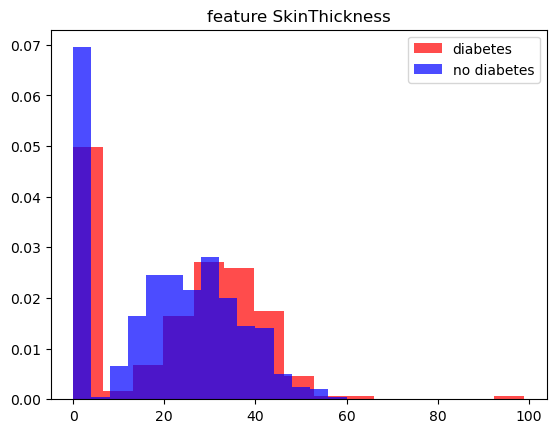

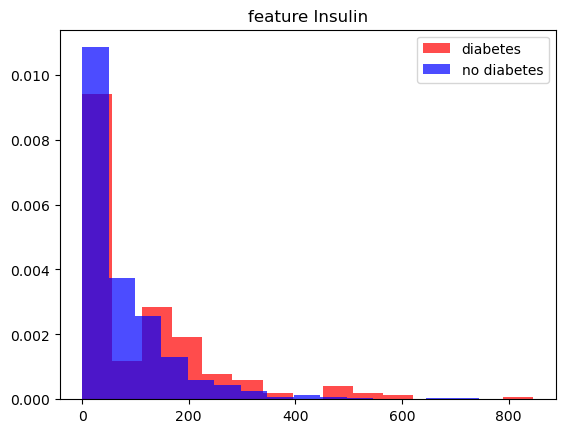

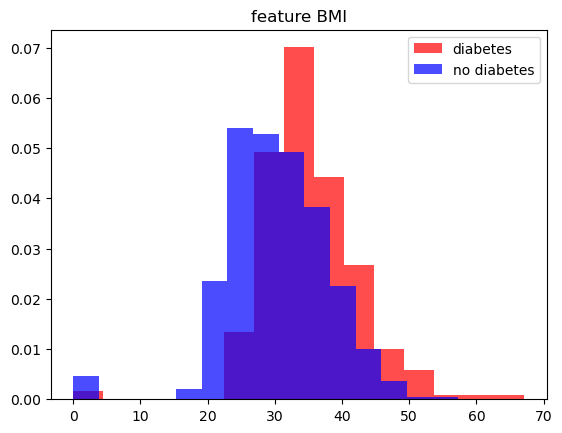

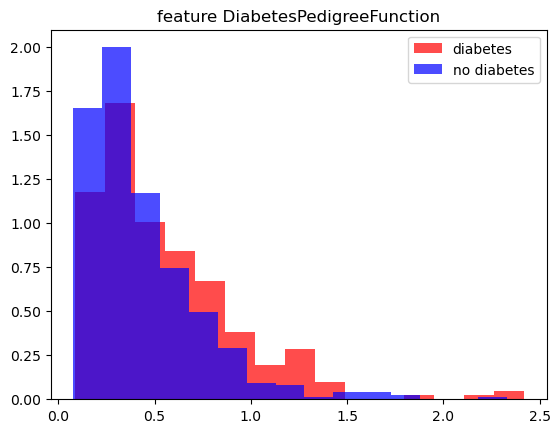

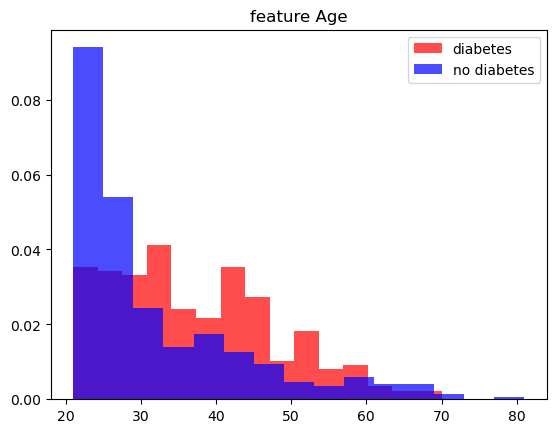

In [3]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome'] == 1][label], color='red', label='diabetes', alpha=0.7, density = True, bins= 15)
    plt.hist(df[df['Outcome'] == 0][label], color='blue', label='no diabetes', alpha = 0.7, density = True, bins= 15)
    plt.title(f'feature {label}')
    plt.legend()
    plt.show()

In [4]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)
transformed_df.head()

over_sampler = RandomOverSampler()
X, y = over_sampler.fit_resample(X, y)

print(len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==1]))

500 500


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.4, random_state=42)
X_test, X_valid, Y_test, Y_valid =  train_test_split( X_test, Y_test, test_size=0.5, random_state=42)

### Build a simple teras sequential layer

In [18]:
model = tf.keras.Sequential(
[
tf.keras.layers.Dense(16, activation='relu'),
   tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid'),
]
)

In [9]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 1e-3), loss = tf.keras.losses.BinaryCrossentropy(),
             metrics= ['accuracy'])

In [10]:
model.evaluate(X_train, Y_train)

19/19 [==============================] - 0s 514us/step - loss: 0.7581 - accuracy: 0.3317


[0.7581188678741455, 0.3316666781902313]

In [11]:
model.fit(X_train, Y_train, batch_size=32, epochs=500 ,validation_data =(X_valid, Y_valid))

Epoch 1/500
19/19 [==============================] - 0s 2ms/step - loss: 0.7236 - accuracy: 0.4117 - val_loss: 0.6987 - val_accuracy: 0.4450
Epoch 2/500
19/19 [==============================] - 0s 1ms/step - loss: 0.6650 - accuracy: 0.5983 - val_loss: 0.6656 - val_accuracy: 0.5850
Epoch 3/500
19/19 [==============================] - 0s 1ms/step - loss: 0.6267 - accuracy: 0.7233 - val_loss: 0.6423 - val_accuracy: 0.6900
Epoch 4/500
19/19 [==============================] - 0s 1ms/step - loss: 0.5972 - accuracy: 0.7467 - val_loss: 0.6220 - val_accuracy: 0.6850
Epoch 5/500
19/19 [==============================] - 0s 1ms/step - loss: 0.5723 - accuracy: 0.7367 - val_loss: 0.6039 - val_accuracy: 0.6750
Epoch 6/500
19/19 [==============================] - 0s 1ms/step - loss: 0.5496 - accuracy: 0.7433 - val_loss: 0.5918 - val_accuracy: 0.7050
Epoch 7/500
19/19 [==============================] - 0s 1ms/step - loss: 0.5311 - accuracy: 0.7550 - val_loss: 0.5818 - val_accuracy: 0.6950
Epoch 8/500
1

Epoch 59/500
19/19 [==============================] - 0s 1ms/step - loss: 0.3917 - accuracy: 0.8250 - val_loss: 0.5815 - val_accuracy: 0.7250
Epoch 60/500
19/19 [==============================] - 0s 1ms/step - loss: 0.3911 - accuracy: 0.8267 - val_loss: 0.5833 - val_accuracy: 0.7300
Epoch 61/500
19/19 [==============================] - 0s 1ms/step - loss: 0.3906 - accuracy: 0.8250 - val_loss: 0.5812 - val_accuracy: 0.7350
Epoch 62/500
19/19 [==============================] - 0s 1ms/step - loss: 0.3891 - accuracy: 0.8233 - val_loss: 0.5852 - val_accuracy: 0.7350
Epoch 63/500
19/19 [==============================] - 0s 1ms/step - loss: 0.3880 - accuracy: 0.8283 - val_loss: 0.5840 - val_accuracy: 0.7300
Epoch 64/500
19/19 [==============================] - 0s 1ms/step - loss: 0.3865 - accuracy: 0.8300 - val_loss: 0.5846 - val_accuracy: 0.7300
Epoch 65/500
19/19 [==============================] - 0s 1ms/step - loss: 0.3848 - accuracy: 0.8317 - val_loss: 0.5835 - val_accuracy: 0.7200
Epoch 

19/19 [==============================] - 0s 1ms/step - loss: 0.3325 - accuracy: 0.8483 - val_loss: 0.6261 - val_accuracy: 0.7100
Epoch 117/500
19/19 [==============================] - 0s 1ms/step - loss: 0.3351 - accuracy: 0.8467 - val_loss: 0.6265 - val_accuracy: 0.7100
Epoch 118/500
19/19 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8500 - val_loss: 0.6214 - val_accuracy: 0.7150
Epoch 119/500
19/19 [==============================] - 0s 1ms/step - loss: 0.3298 - accuracy: 0.8417 - val_loss: 0.6230 - val_accuracy: 0.7100
Epoch 120/500
19/19 [==============================] - 0s 1ms/step - loss: 0.3296 - accuracy: 0.8450 - val_loss: 0.6299 - val_accuracy: 0.7100
Epoch 121/500
19/19 [==============================] - 0s 1ms/step - loss: 0.3290 - accuracy: 0.8517 - val_loss: 0.6253 - val_accuracy: 0.7150
Epoch 122/500
19/19 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8483 - val_loss: 0.6235 - val_accuracy: 0.7100
Epoch 123/500

19/19 [==============================] - 0s 994us/step - loss: 0.2783 - accuracy: 0.8783 - val_loss: 0.6577 - val_accuracy: 0.7300
Epoch 174/500
19/19 [==============================] - 0s 1ms/step - loss: 0.2778 - accuracy: 0.8833 - val_loss: 0.6538 - val_accuracy: 0.7350
Epoch 175/500
19/19 [==============================] - 0s 1ms/step - loss: 0.2765 - accuracy: 0.8833 - val_loss: 0.6573 - val_accuracy: 0.7350
Epoch 176/500
19/19 [==============================] - 0s 1ms/step - loss: 0.2752 - accuracy: 0.8850 - val_loss: 0.6589 - val_accuracy: 0.7400
Epoch 177/500
19/19 [==============================] - 0s 952us/step - loss: 0.2753 - accuracy: 0.8883 - val_loss: 0.6569 - val_accuracy: 0.7350
Epoch 178/500
19/19 [==============================] - 0s 1ms/step - loss: 0.2752 - accuracy: 0.8833 - val_loss: 0.6623 - val_accuracy: 0.7300
Epoch 179/500
19/19 [==============================] - 0s 995us/step - loss: 0.2727 - accuracy: 0.8867 - val_loss: 0.6593 - val_accuracy: 0.7300
Epoch 1

19/19 [==============================] - 0s 1ms/step - loss: 0.2333 - accuracy: 0.9117 - val_loss: 0.6981 - val_accuracy: 0.7350
Epoch 231/500
19/19 [==============================] - 0s 1ms/step - loss: 0.2321 - accuracy: 0.9033 - val_loss: 0.6993 - val_accuracy: 0.7550
Epoch 232/500
19/19 [==============================] - 0s 1ms/step - loss: 0.2294 - accuracy: 0.9100 - val_loss: 0.6965 - val_accuracy: 0.7550
Epoch 233/500
19/19 [==============================] - 0s 952us/step - loss: 0.2305 - accuracy: 0.9083 - val_loss: 0.6987 - val_accuracy: 0.7550
Epoch 234/500
19/19 [==============================] - 0s 1ms/step - loss: 0.2288 - accuracy: 0.9050 - val_loss: 0.6987 - val_accuracy: 0.7550
Epoch 235/500
19/19 [==============================] - 0s 1ms/step - loss: 0.2295 - accuracy: 0.9083 - val_loss: 0.7012 - val_accuracy: 0.7600
Epoch 236/500
19/19 [==============================] - 0s 1ms/step - loss: 0.2274 - accuracy: 0.9133 - val_loss: 0.7005 - val_accuracy: 0.7600
Epoch 237/5

19/19 [==============================] - 0s 1ms/step - loss: 0.1910 - accuracy: 0.9300 - val_loss: 0.7458 - val_accuracy: 0.7500
Epoch 288/500
19/19 [==============================] - 0s 1ms/step - loss: 0.1916 - accuracy: 0.9283 - val_loss: 0.7393 - val_accuracy: 0.7600
Epoch 289/500
19/19 [==============================] - 0s 2ms/step - loss: 0.1899 - accuracy: 0.9333 - val_loss: 0.7437 - val_accuracy: 0.7600
Epoch 290/500
19/19 [==============================] - 0s 1ms/step - loss: 0.1881 - accuracy: 0.9317 - val_loss: 0.7442 - val_accuracy: 0.7650
Epoch 291/500
19/19 [==============================] - 0s 1ms/step - loss: 0.1892 - accuracy: 0.9350 - val_loss: 0.7457 - val_accuracy: 0.7600
Epoch 292/500
19/19 [==============================] - 0s 1ms/step - loss: 0.1875 - accuracy: 0.9317 - val_loss: 0.7473 - val_accuracy: 0.7600
Epoch 293/500
19/19 [==============================] - 0s 1ms/step - loss: 0.1872 - accuracy: 0.9350 - val_loss: 0.7410 - val_accuracy: 0.7600
Epoch 294/500

19/19 [==============================] - 0s 1ms/step - loss: 0.1557 - accuracy: 0.9483 - val_loss: 0.7871 - val_accuracy: 0.7550
Epoch 345/500
19/19 [==============================] - 0s 1ms/step - loss: 0.1560 - accuracy: 0.9467 - val_loss: 0.7819 - val_accuracy: 0.7550
Epoch 346/500
19/19 [==============================] - 0s 971us/step - loss: 0.1547 - accuracy: 0.9467 - val_loss: 0.7858 - val_accuracy: 0.7550
Epoch 347/500
19/19 [==============================] - 0s 1ms/step - loss: 0.1538 - accuracy: 0.9467 - val_loss: 0.7828 - val_accuracy: 0.7600
Epoch 348/500
19/19 [==============================] - 0s 1ms/step - loss: 0.1536 - accuracy: 0.9483 - val_loss: 0.7911 - val_accuracy: 0.7500
Epoch 349/500
19/19 [==============================] - 0s 1ms/step - loss: 0.1541 - accuracy: 0.9467 - val_loss: 0.7867 - val_accuracy: 0.7600
Epoch 350/500
19/19 [==============================] - 0s 1ms/step - loss: 0.1537 - accuracy: 0.9450 - val_loss: 0.7832 - val_accuracy: 0.7550
Epoch 351/5

19/19 [==============================] - 0s 1ms/step - loss: 0.1284 - accuracy: 0.9567 - val_loss: 0.8260 - val_accuracy: 0.7700
Epoch 402/500
19/19 [==============================] - 0s 1ms/step - loss: 0.1251 - accuracy: 0.9617 - val_loss: 0.8300 - val_accuracy: 0.7600
Epoch 403/500
19/19 [==============================] - 0s 1ms/step - loss: 0.1257 - accuracy: 0.9600 - val_loss: 0.8281 - val_accuracy: 0.7650
Epoch 404/500
19/19 [==============================] - 0s 1ms/step - loss: 0.1268 - accuracy: 0.9550 - val_loss: 0.8324 - val_accuracy: 0.7650
Epoch 405/500
19/19 [==============================] - 0s 1ms/step - loss: 0.1254 - accuracy: 0.9617 - val_loss: 0.8276 - val_accuracy: 0.7600
Epoch 406/500
19/19 [==============================] - 0s 1ms/step - loss: 0.1267 - accuracy: 0.9567 - val_loss: 0.8356 - val_accuracy: 0.7700
Epoch 407/500
19/19 [==============================] - 0s 1ms/step - loss: 0.1277 - accuracy: 0.9650 - val_loss: 0.8336 - val_accuracy: 0.7650
Epoch 408/500

19/19 [==============================] - 0s 1ms/step - loss: 0.1022 - accuracy: 0.9700 - val_loss: 0.9177 - val_accuracy: 0.7750
Epoch 459/500
19/19 [==============================] - 0s 1ms/step - loss: 0.1013 - accuracy: 0.9700 - val_loss: 0.9144 - val_accuracy: 0.7650
Epoch 460/500
19/19 [==============================] - 0s 1ms/step - loss: 0.1011 - accuracy: 0.9733 - val_loss: 0.9216 - val_accuracy: 0.7700
Epoch 461/500
19/19 [==============================] - 0s 1ms/step - loss: 0.1008 - accuracy: 0.9700 - val_loss: 0.9192 - val_accuracy: 0.7650
Epoch 462/500
19/19 [==============================] - 0s 1ms/step - loss: 0.1001 - accuracy: 0.9717 - val_loss: 0.9252 - val_accuracy: 0.7700
Epoch 463/500
19/19 [==============================] - 0s 1ms/step - loss: 0.0997 - accuracy: 0.9683 - val_loss: 0.9180 - val_accuracy: 0.7550
Epoch 464/500
19/19 [==============================] - 0s 1ms/step - loss: 0.1002 - accuracy: 0.9717 - val_loss: 0.9220 - val_accuracy: 0.7700
Epoch 465/500

In [12]:
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 552us/step - loss: 0.7663 - accuracy: 0.8050


[0.7663397789001465, 0.8050000071525574]